# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
from collections import Counter as c 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Reading the Datasets

In [ ]:
rides_df = pd.read_csv('cab_rides.csv')
weather_df = pd.read_csv('weather.csv')

In [ ]:
rides_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Understanding Data Type And Summary Of Features

In [ ]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


# Take Care Of Missing Data & Create Columns

In [ ]:
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [ ]:
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [ ]:
weather_df = weather_df.fillna(0)

In [ ]:
rides_df['date'] = pd.to_datetime(rides_df['time_stamp']/ 1000, unit = 's')
weather_df['date'] = pd.to_datetime(weather_df['time_stamp'], unit = 's')

In [ ]:
# Creating the new column that contain the location and 
rides_df['merged_date'] = rides_df['source'].astype('str') + ' - ' + rides_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + rides_df['date'].dt.hour.astype('str')
weather_df['merged_date'] = weather_df['location'].astype('str') + ' - ' + weather_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + weather_df['date'].dt.hour.astype('str')

In [ ]:
# Join the weather date on rides data
#df_joined = rides_df.concat(weather_df, on = ['merged_date'], rsuffix ='_w')
df_joined = pd.concat([rides_df,weather_df])

In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699347 entries, 0 to 6275
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          693071 non-null  float64       
 1   cab_type          693071 non-null  object        
 2   time_stamp        699347 non-null  int64         
 3   destination       693071 non-null  object        
 4   source            693071 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  693071 non-null  float64       
 7   id                693071 non-null  object        
 8   product_id        693071 non-null  object        
 9   name              693071 non-null  object        
 10  date              699347 non-null  datetime64[ns]
 11  merged_date       699347 non-null  object        
 12  temp              6276 non-null    float64       
 13  location          6276 non-null    object        
 14  clouds

In [ ]:
df_joined['id'].value_counts()

424553bb-7174-41ea-aeb4-fe06d4f4b9d7    1
86557077-556d-4cc0-8acf-4d618d5c0a8d    1
fa75d4b4-52c8-4e65-a5e6-335c8268c968    1
2d051bf0-4e5e-4b18-a931-ea15c4fb9066    1
7339fbe3-b0bb-4bac-a037-b1dc2ab0feac    1
                                       ..
0281be2d-1573-47a5-868d-fef6100d1b77    1
33827bd1-5164-4579-b567-14e85220c99b    1
6c736bfe-40d0-47b9-be59-ef41d9df516b    1
7311da4b-0932-4572-97ee-242a9e5f0229    1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda    1
Name: id, Length: 693071, dtype: int64

In [ ]:
df_joined[df_joined['id'] == '0281be2d-1573-47a5-868d-fef6100d1b77'].iloc[:,10:22]

,date,merged_date,temp,location,clouds,pressure,rain,humidity,wind
231024,2018-12-15 02:05:13.832999936,Beacon Hill - 2018-12-15 - 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
id_group = pd.DataFrame(df_joined.groupby('id')['temp','clouds', 'pressure', 'rain', 'humidity', 'wind'].mean())
df_rides_weather = rides_df.join(id_group, on = ['id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# Creating the columns for Month, Hour and Weekdays 
df_rides_weather['Month'] = df_rides_weather['date'].dt.month
df_rides_weather['Hour'] = df_rides_weather['date'].dt.hour
df_rides_weather['Day'] =  df_rides_weather['date'].dt.strftime('%A')

# Data Visualization

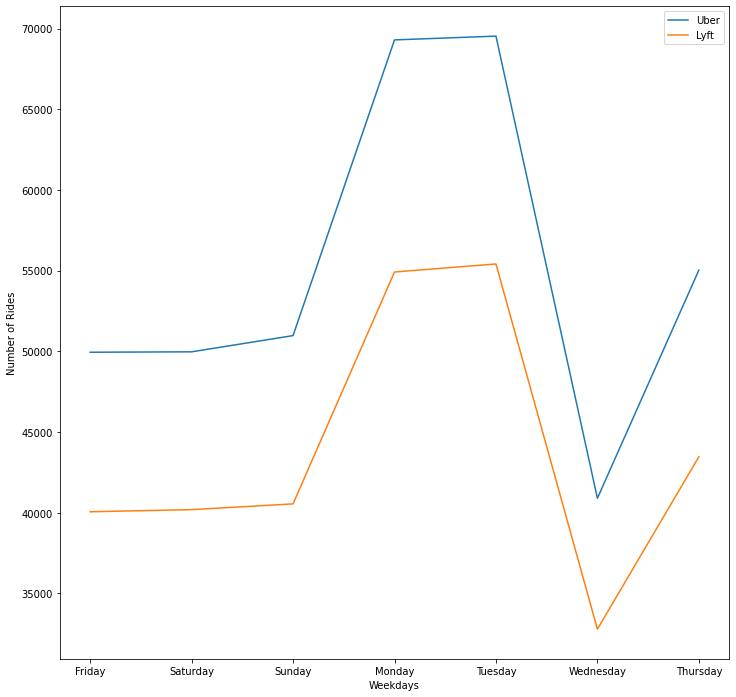

In [ ]:
# The distribution of rides in weekdays 
import matplotlib.pyplot as plt
uber_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['Day'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
lyft_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['Day'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])

fig , ax = plt.subplots(figsize = (12,12))
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')
ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

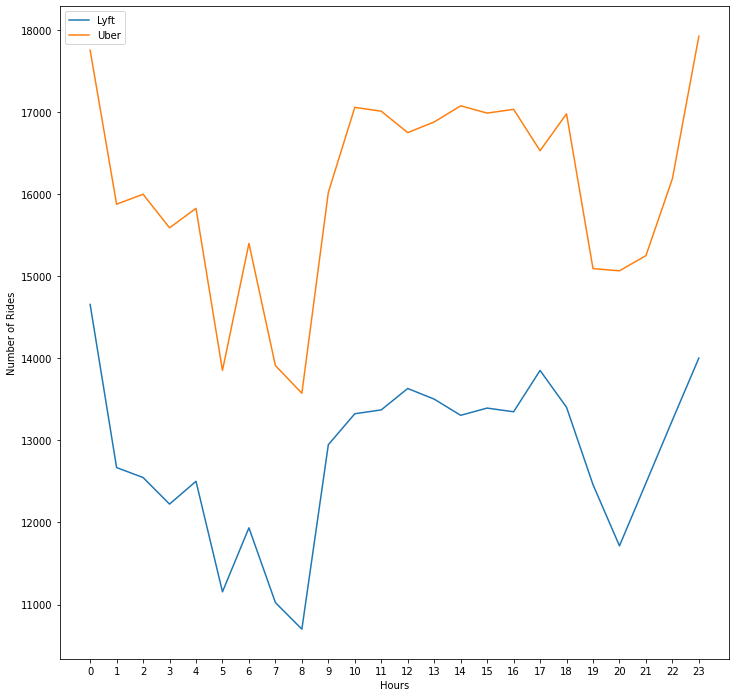

In [ ]:
# The ride distribution in one day 
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()


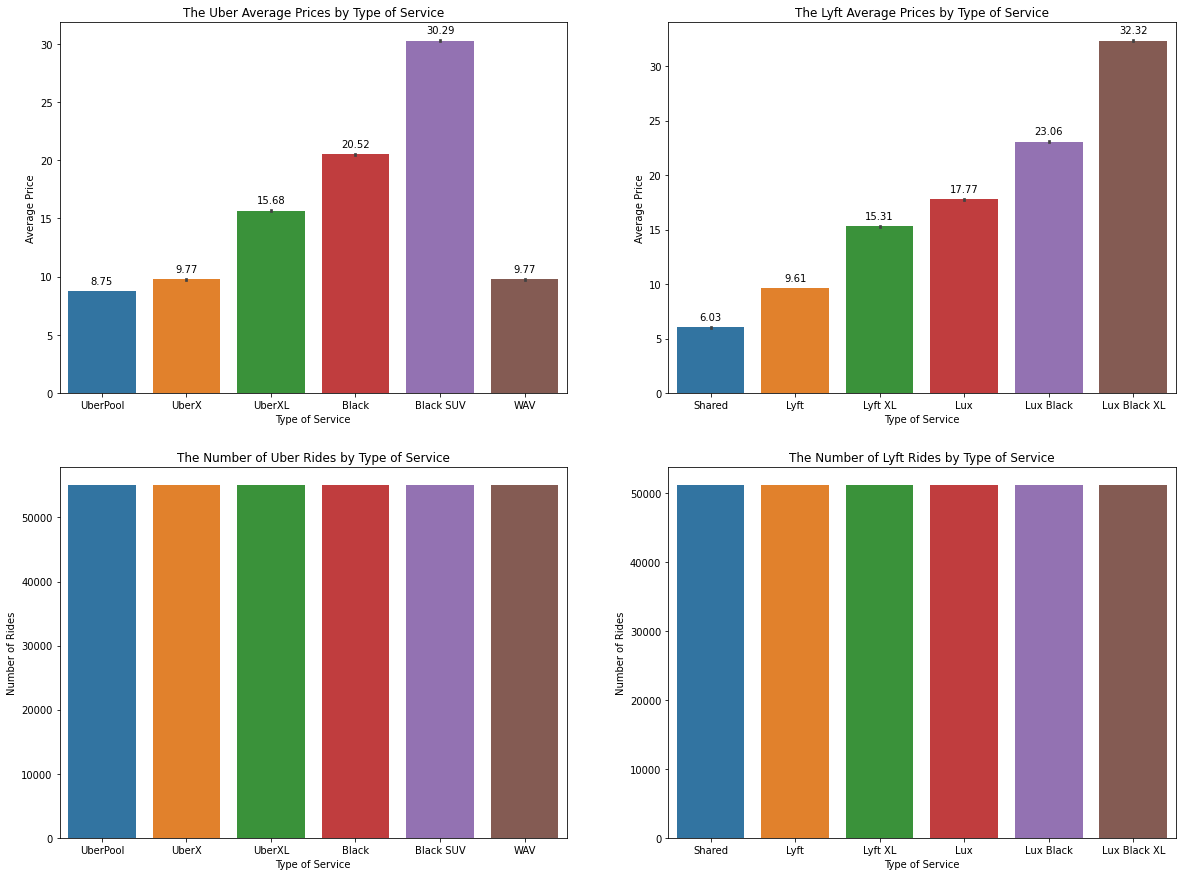

In [ ]:
# The Average price of rides by type of service

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']
fig, ax = plt.subplots(2,2, figsize = (20,15))
ax1 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].price , ax = ax[0,0], order = uber_order)
ax2 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].price , ax = ax[0,1], order = lyft_order)
ax3 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[1,0] ,order = uber_order)
ax4 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1,1],order = lyft_order)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax3.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax4.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')
ax3.set_title('The Number of Uber Rides by Type of Service')
ax4.set_title('The Number of Lyft Rides by Type of Service')
plt.show()

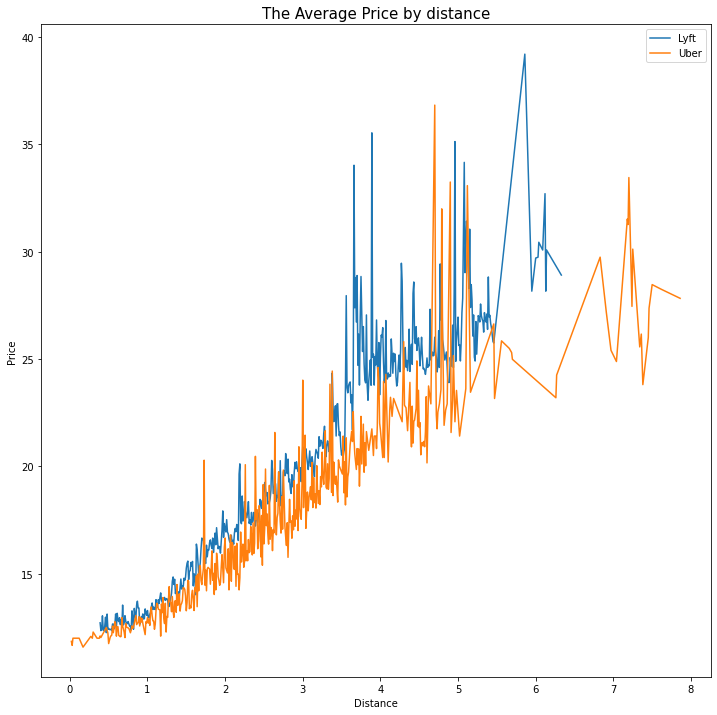

In [ ]:
# The average price by distance
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize = 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()


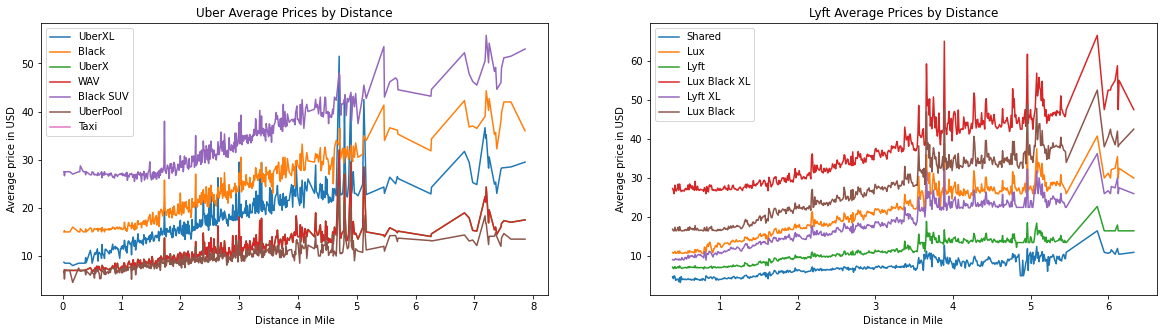

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (20,5))
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean().index, df_rides_weather[ df_rides_weather['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()

# Drop The Column From Dataframe ,Merge The Dataframes

In [ ]:
rides_df = rides_df.drop('time_stamp', axis=1)
rides_df = rides_df.drop('date', axis=1,)

In [ ]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54


In [ ]:
weather_df.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [ ]:
weather_df = weather_df.drop('merged_date', axis=1)
weather_df = weather_df.drop('date', axis=1)

In [ ]:
avg_weather_df = weather_df.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp', axis=1)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [ ]:
rides_df

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,merged_date
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Haymarket Square - 2018-11-29 - 3
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,West End - 2018-12-01 - 23
693067,1.00,Uber,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,West End - 2018-12-01 - 23
693068,1.00,Uber,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,West End - 2018-12-01 - 23
693069,1.00,Uber,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,West End - 2018-12-01 - 23


In [ ]:
source_weather_df = avg_weather_df.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [ ]:
destination_weather_df = avg_weather_df.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [ ]:
rides_df = rides_df.dropna(axis=0).reset_index(drop=True)

In [ ]:
data = rides_df\
    .merge(source_weather_df, on='source')\
    .merge(destination_weather_df, on='destination')

data

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,merged_date,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Haymarket Square - 2018-12-16 - 9,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square - 2018-11-27 - 2,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Haymarket Square - 2018-11-28 - 1,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Haymarket Square - 2018-11-30 - 4,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Haymarket Square - 2018-11-29 - 3,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,Financial District - 2018-11-26 - 7,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,Financial District - 2018-11-26 - 7,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,Financial District - 2018-11-29 - 4,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,Financial District - 2018-12-14 - 4,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop id column
    df = df.drop('id', axis=1)
    
    # Binary encode cab_type column
    df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
    # One-hot encode remaining categorical columns
    for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
        df = onehot_encode(df, column=column, prefix=prefix)
          
    # Split df into X and y
    y = df['price']
    X = df.drop('price', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    return X_train, X_test, y_train, y_test

# Observing Target, Numerical And Categorical Columns

In [ ]:
cat = data.dtypes[data.dtypes=='O'].index.values
cat

array(['cab_type', 'destination', 'source', 'id', 'product_id', 'name',
       'merged_date'], dtype=object)

In [ ]:
for i in cat:
    print("column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

column : cab_type
count of classes :  2
Counter({'Uber': 330568, 'Lyft': 307408})
************************************************************************************************************************
column : destination
count of classes :  12
Counter({'Financial District': 54192, 'Back Bay': 53190, 'Theatre District': 53189, 'Boston University': 53171, 'Haymarket Square': 53171, 'Fenway': 53166, 'Northeastern University': 53165, 'North End': 53164, 'South Station': 53159, 'West End': 52992, 'Beacon Hill': 52840, 'North Station': 52577})
************************************************************************************************************************
column : source
count of classes :  12
Counter({'Financial District': 54197, 'Back Bay': 53201, 'Theatre District': 53201, 'Boston University': 53172, 'North End': 53171, 'Fenway': 53166, 'Northeastern University': 53164, 'South Station': 53160, 'Haymarket Square': 53147, 'West End': 52980, 'Beacon Hill': 52841, 'North Station': 5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
************************************************************************************************************************
column : merged_date
count of classes :  3984
Counter({'North Station - 2018-11-29 - 0': 485, 'Financial District - 2018-11-29 - 0': 479, 'Haymarket Square - 2018-11-29 - 0': 475, 'North End - 2018-11-29 - 0': 465, 'Beacon Hill - 2018-11-29 - 3': 465, 'Boston University - 2018-11-29 - 0': 459, 'Fenway - 2018-11-28 - 22': 458, 'Northeastern University - 2018-11-29 - 1': 451, 'Back Bay - 2018-11-28 - 11': 451, 'North Station - 2018-11-28 - 23': 449, 'Northeastern University - 2018-11-28 - 12': 447, 'South Station - 2018-11-28 - 23': 446, 'Northeastern University - 2018-11-28 - 17': 443, 'Financial District - 2018-11-29 - 1': 442, 'North End - 2018-11-28 

In [ ]:
data.dtypes[data.dtypes!='O'].index.values

array(['distance', 'price', 'surge_multiplier', 'source_temp',
       'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'], dtype=object)

# Label Encoding

In [ ]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(data[i]))
    data[i] = LE.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

LABEL ENCODING OF: cab_type
Counter({'Uber': 330568, 'Lyft': 307408})
Counter({1: 330568, 0: 307408})
****************************************************************************************************
LABEL ENCODING OF: destination
Counter({'Financial District': 54192, 'Back Bay': 53190, 'Theatre District': 53189, 'Boston University': 53171, 'Haymarket Square': 53171, 'Fenway': 53166, 'Northeastern University': 53165, 'North End': 53164, 'South Station': 53159, 'West End': 52992, 'Beacon Hill': 52840, 'North Station': 52577})
Counter({4: 54192, 0: 53190, 10: 53189, 2: 53171, 5: 53171, 3: 53166, 8: 53165, 6: 53164, 9: 53159, 11: 52992, 1: 52840, 7: 52577})
****************************************************************************************************
LABEL ENCODING OF: source
Counter({'Financial District': 54197, 'Back Bay': 53201, 'Theatre District': 53201, 'Boston University': 53172, 'North End': 53171, 'Fenway': 53166, 'Northeastern University': 53164, 'South Station': 53160, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({5: 55096, 2: 55096, 3: 55096, 1: 55095, 0: 55094, 4: 55091, 11: 51235, 6: 51235, 9: 51235, 10: 51235, 8: 51235, 7: 51233})
****************************************************************************************************
LABEL ENCODING OF: name
Counter({'WAV': 55096, 'Black SUV': 55096, 'UberXL': 55096, 'Black': 55095, 'UberX': 55094, 'UberPool': 55091, 'Lux': 51235, 'Lyft': 51235, 'Lux Black XL': 51235, 'Lyft XL': 51235, 'Lux Black': 51235, 'Shared': 51233})
Counter({11: 55096, 1: 55096, 10: 55096, 0: 55095, 9: 55094, 8: 55091, 2: 51235, 5: 51235, 4: 51235, 6: 51235, 3: 51235, 7: 51233})
****************************************************************************************************
LABEL ENCODING OF: merged_date
Counter({'North Station - 2018-11-29 - 0': 485, 'Financial District - 2018-11-29 - 0': 479, 'Haymarket Square - 2018-11-29 - 0': 475, 'North End - 2018-11-29 - 0': 465, 'Beacon Hill - 2018-11-29 - 3': 465, 'Boston University - 2018-11-29 - 0': 459, 'Fenway - 2

# Error Below

In [ ]:
x = data.drop(['price', 'distance','surge_multiplier', 'id', 'source_temp', 'source_clouds', 'source_pressure','source_rain','source_humidity','source_wind'],axis=1) 
x = pd.DataFrame(x) 
y = data['price'] #dependent feature source_pressure
y=pd.DataFrame (y)

In [ ]:
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,merged_date,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,0,7,5,5.0,1.0,165097,7,7,1947,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,0,7,5,11.0,1.0,188776,11,2,1693,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,0,7,5,7.0,1.0,378853,6,5,1706,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,0,7,5,26.0,1.0,485300,9,4,1766,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,0,7,5,9.0,1.0,558249,10,6,1741,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755


# Split The Dataset Into Train Set And Test Set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)

(510380, 12)
(127596, 12)


# Model Building (Train and Test Model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=20,random_state=52,n_jobs=-1,max_depth=4)
rand.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=52)

In [ ]:
ypred=rand.predict(x_test)
print(ypred)

[34.50571776 20.36602934  9.54753035 ...  6.02421004 26.79738243
 19.16924677]


# model evaluation

In [ ]:
rand.score(x_train,y_train)

0.7649637474366435

# saving the model

In [ ]:
import pickle
pickle.dump(rand, open("model.pk1", "wb"))